In [12]:
import unicodedata, collections
import pandas as pd
import matplotlib.pyplot as plt
from stop_words import get_stop_words

from preprocessing import get_text
from Syllabizer import silabizer


path = 'D:\\Documentos\\GitHub\\freestyle_generator\\'
dataset_path = path + 'data\\'
corpus_path = dataset_path + 'corpus.txt' # Elegir entre BD total o de fs

with open(corpus_path, 'r', encoding='utf-8') as corpus_file:
    corpus = corpus_file.read()

corpus = unicodedata.normalize('NFC', corpus)

Tokenización por palabras

In [6]:
corpus_to_tokenize = corpus
symbols = ['\n','?','¿',',','.','"',':',"'",'(',')']

for s in symbols:
    corpus_to_tokenize = corpus_to_tokenize.replace(s, ' ' + s + ' ')
tokenized_text = [w for w in corpus_to_tokenize.split(' ') if (w.strip() != '' or w == '\n')]

stop_words = get_stop_words('es') + symbols + ['vos', 'si', 'voy']

counter = collections.Counter(tokenized_text)

token_freq = collections.Counter({key: value for key, value in counter.items() if (key not in stop_words)})
#token_freq = collections.Counter({key: value for key, value in counter.items()})

token_freq_df = pd.DataFrame(token_freq.most_common(30), columns=['palabras', 'apariciones'])

token_freq_df.head()


,palabras,apariciones
0,pa,2491
1,yeah,1422
2,quiero,1377
3,siempre,1234
4,sé,1117


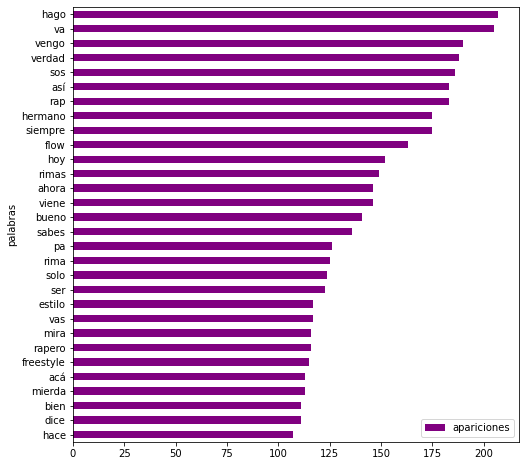

In [3]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
token_freq_df.sort_values(by='apariciones').plot.barh(x='palabras',
                      y='apariciones',
                      ax=ax,
                      color="purple")

plt.show()

In [3]:
print(len(counter.items()))

unique_tokens = [key for key, value in counter.items() if value <= 1]
tokens_freq_3 = [key for key, value in counter.items() if value <= 3]

print(len(unique_tokens))
print(len(tokens_freq_3))

print(unique_tokens[:50])
print(len(tokenized_text))

seq_len = 5
unique_tokens_seq, freq_3_seq = 0, 0
for i in range(0, len(tokenized_text) - seq_len):
    if len(set(tokenized_text[i: i + seq_len + 1]).intersection(set(unique_tokens))) != 0:
        unique_tokens_seq += 1
    if len(set(tokenized_text[i: i + seq_len + 1]).intersection(set(tokens_freq_3))) != 0:
        freq_3_seq += 1

print('Secuencias con tokens unicos: {}, con tokens con freq < 4: {}, total: {}'.format(unique_tokens_seq, freq_3_seq, len(tokenized_text) - seq_len))

8681
4723
6847
['muerdo', 'creación', 'relación', 'dominó', 'póquer', 'perdurar', 'cordura', 'excusa', 'ruleta', 'aliño', 'equivoquen', 'mutis', 'cutis', 'acaparo', 'comparo', 'call', 'of', 'duty', 'tembladeras', 'guantanamera', 'suspira', 'transpira', 'elimina', 'trayendo', 'indulto', 'adulto', 'ludo', 'payaya', 'violé', 'kimi', 'polaroyd', 'detroit', 'cowboy', 'lindo', 'brindo', 'evacuar', 'entendía', 'linchaco', 'escalo', 'falo', 'hiphoperos', 'snoopy', 'desenmascara', 'hiciera', 'tajo', 'chucky', 'galardón', 'speedy', 'gonzales', 'estructuraciones']
89365


Análisis por sílaba

In [7]:

s = silabizer()
tokenized_text_s = list(map(s, tokenized_text))
flat_list = []
for i, word in enumerate(tokenized_text_s):
    for sylab in word:
        flat_list.append(sylab)
    if (word != ["\n"] and (i+1 < len(tokenized_text_s) and tokenized_text_s[i+1] != ["\n"])):
        flat_list.append('\ ')
tokenized_text_s = flat_list

counter_s = collections.Counter(tokenized_text_s)
token_freq_s = collections.Counter({key: value for key, value in counter_s.items()})

token_freq_s_df = pd.DataFrame(token_freq_s.most_common(27), columns=['palabras', 'apariciones'])

token_freq_s_df.head()

,palabras,apariciones
0,\,443985
1,\n,73441
2,",",33384
3,a,24081
4,que,22321


In [10]:
print(len(counter_s.items()))

unique_tokens_s = [key for key, value in counter_s.items() if value <= 1]
tokens_freq_3_s = [key for key, value in counter_s.items() if value <= 3]

print(len(unique_tokens_s))
print(len(tokens_freq_3_s))
print(unique_tokens_s[:50])

print(len(tokenized_text_s))

seq_len = 12
unique_tokens_seq_s, freq_3_seq_s = 0, 0
for i in range(0, len(tokenized_text_s) - seq_len):
    if len(set(tokenized_text_s[i: i + seq_len + 1]).intersection(set(unique_tokens_s))) != 0:
        unique_tokens_seq_s += 1
    if len(set(tokenized_text_s[i: i + seq_len + 1]).intersection(set(tokens_freq_3_s))) != 0:
        freq_3_seq_s += 1

print('Secuencias con tokens unicos: {}, con tokens con freq < 4: {}, total: {}'.format(unique_tokens_seq_s, freq_3_seq_s, len(tokenized_text_s) - seq_len))

4647
1208
2086
['quer', 'rdu', 'rioh', 'ciai', 'riol', 'brís', 'tay', 'mcdon', 'xor', 'mp3', 'f5', 'b-bue', 'grón', 'tak', 'roid', 'uon', 'haus', 'splin', 'choms', 'vey', 'drim', 'det', 'tyler', 'buk', 'dren', 'fp', 'fai', 'gác', 'pén', 'tós', 'kaf', 'blí', '-zag', 'c-co', 'qú', 'keys', 'tián', '2e', 'mc2', 'tul', 'cic', 'bral', 'wái', 'cpu', 'tnt', 'sko', '¡tiem', 'zeus', 'jig', 'rós']
1351639
Secuencias con tokens unicos: 14703, con tokens con freq < 4: 38548, total: 1351627


Análisis usando BPE

In [13]:
import glob
from tokenizers import Tokenizer, Encoding
from tokenizers.models import BPE
from tokenizers.trainers import BpeTrainer
from tokenizers.pre_tokenizers import Metaspace
from tokenizers.processors import TemplateProcessing

VS = 5000

tokenizer = Tokenizer(BPE(unk_token='[UNK]'))
tokenizer.pre_tokenizer = Metaspace()

files = glob.glob(dataset_path + '/**/*.txt', recursive=True)

trainer = BpeTrainer(vocab_size=VS, special_tokens=['[UNK]', '[SEP]'])
tokenizer.train(files, trainer)

tokenizer.post_processor = TemplateProcessing(
    single="$0 [SEP]",
    special_tokens=[("[SEP]", tokenizer.token_to_id("[SEP]"))],
)

#tokenizer.save(dataset_path + "tokenizer-bpe-" + str(VS) + ".json")

vocab = tokenizer.get_vocab()

print(tokenizer.get_vocab_size())

5000


In [14]:
encoders = tokenizer.encode_batch(list(filter(lambda line: line, corpus.split('\n'))))
encoder = Encoding.merge(encoders)

tokenized_bpe = encoder.tokens

print(tokenized_bpe[:50])

counter_bpe = collections.Counter(tokenized_bpe)

token_freq_bpe_df = pd.DataFrame(counter_bpe.most_common(60), columns=['tokens', 'apariciones'])

token_freq_bpe_df.head()

['▁en', '▁la', '▁improvisa', 'ción', '[SEP]', '▁lamenta', 'ble', 'mente', '▁yo', '▁muer', 'do', '▁como', '▁le', 'ón', '[SEP]', '▁yo', '▁te', '▁prendo', '▁fuego,', '▁el', '▁concep', 'to', '▁es', '▁juego', '[SEP]', '▁y', '▁contra', '▁mí', '▁es', '▁como', '▁un', '▁par', 'que', '▁de', '▁diver', 'sión', '[SEP]', '▁te', '▁falta', '▁aprender', '▁que', '▁tengo', '▁crea', 'ción', '[SEP]', '▁y', '▁que', '▁cuando', '▁yo', '▁canto']


,tokens,apariciones
0,[SEP],61881
1,▁que,18403
2,▁no,12040
3,▁la,11483
4,▁el,10354


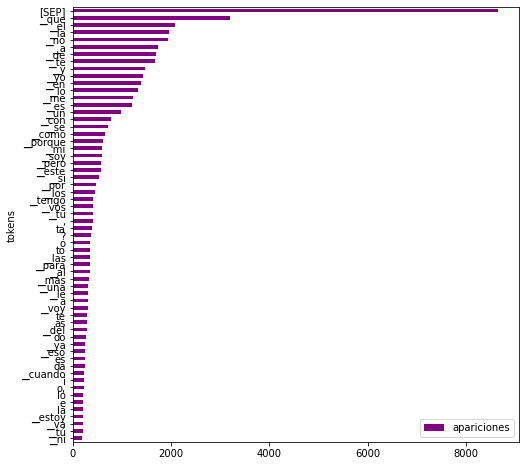

In [9]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
token_freq_bpe_df.sort_values(by='apariciones').plot.barh(x='tokens',
                      y='apariciones',
                      ax=ax,
                      color="purple")

plt.show()

In [15]:
print(len(counter_bpe.items()))

unique_tokens_bpe = [key for key, value in counter_bpe.items() if value <= 1]
tokens_freq_3_bpe = [key for key, value in counter_bpe.items() if value <= 3]

print(len(unique_tokens_bpe))
print(len(tokens_freq_3_bpe))
print(unique_tokens_bpe[:50])

print(len(tokenized_bpe))

seq_len = 6
unique_tokens_seq_bpe, freq_3_seq_bpe = 0, 0
for i in range(0, len(tokenized_bpe) - seq_len):
    if len(set(tokenized_bpe[i: i + seq_len + 1]).intersection(set(unique_tokens_bpe))) != 0:
        unique_tokens_seq_bpe += 1
    if len(set(tokenized_bpe[i: i + seq_len + 1]).intersection(set(tokens_freq_3_bpe))) != 0:
        freq_3_seq_bpe += 1

print('Secuencias con tokens unicos: {}, con tokens con freq < 4: {}, total: {}'.format(unique_tokens_seq_bpe, freq_3_seq_bpe, len(tokenized_bpe) - seq_len))

4225
20
56
['ruga', '▁tampo', '▁púr', 'ápi', '▁pú', '▁pp', '&', 'h-y', 'à', '▁estru', '▁despué', '▁fues', 'güen', '\x93', '\x94', '▁sai', '▁rott', 'rari', 'egu', '▁ater']
674692
Secuencias con tokens unicos: 137, con tokens con freq < 4: 776, total: 674686


BPE different VS

In [16]:
import glob
from tokenizers import Tokenizer, Encoding
from tokenizers.models import BPE
from tokenizers.trainers import BpeTrainer
from tokenizers.pre_tokenizers import Metaspace
from tokenizers.processors import TemplateProcessing

VS = 1000

tokenizer = Tokenizer(BPE(unk_token='[UNK]'))
tokenizer.pre_tokenizer = Metaspace()

files = glob.glob(dataset_path + '/**/*.txt', recursive=True)

trainer = BpeTrainer(vocab_size=VS, special_tokens=['[UNK]', '[SEP]'])
tokenizer.train(files, trainer)

tokenizer.post_processor = TemplateProcessing(
    single="$0 [SEP]",
    special_tokens=[("[SEP]", tokenizer.token_to_id("[SEP]"))],
)

vocab = tokenizer.get_vocab()

print(tokenizer.get_vocab_size())

encoders = tokenizer.encode_batch(list(filter(lambda line: line, corpus.split('\n'))))
encoder = Encoding.merge(encoders)

tokenized_bpe = encoder.tokens

print(tokenized_bpe[:50])

counter_bpe = collections.Counter(tokenized_bpe)

unique_tokens_bpe = [key for key, value in counter_bpe.items() if value <= 1]
tokens_freq_3_bpe = [key for key, value in counter_bpe.items() if value <= 3]

print(unique_tokens_bpe[:50])

seq_len = 8
unique_tokens_seq_bpe, freq_3_seq_bpe = 0, 0
for i in range(0, len(tokenized_bpe) - seq_len):
    if len(set(tokenized_bpe[i: i + seq_len + 1]).intersection(set(unique_tokens_bpe))) != 0:
        unique_tokens_seq_bpe += 1
    if len(set(tokenized_bpe[i: i + seq_len + 1]).intersection(set(tokens_freq_3_bpe))) != 0:
        freq_3_seq_bpe += 1

print('Cantidad de tokens unicos: {}, cantidad de tokens con freq < 4: {}, total tokens: {}'.format(len(unique_tokens_bpe), len(tokens_freq_3_bpe), len(counter_bpe.items())))
print('Secuencias con tokens unicos: {}, con tokens con freq < 4: {}, total: {}'.format(unique_tokens_seq_bpe, freq_3_seq_bpe, len(tokenized_bpe) - seq_len))

1000
['▁en', '▁la', '▁improvis', 'a', 'ción', '[SEP]', '▁la', 'm', 'enta', 'ble', 'mente', '▁yo', '▁muer', 'do', '▁como', '▁le', 'ón', '[SEP]', '▁yo', '▁te', '▁pr', 'endo', '▁fue', 'go,', '▁el', '▁con', 'ce', 'p', 'to', '▁es', '▁jue', 'go', '[SEP]', '▁y', '▁contra', '▁mí', '▁es', '▁como', '▁un', '▁par', 'que', '▁de', '▁di', 'ver', 'si', 'ón', '[SEP]', '▁te', '▁falta', '▁ap']
['\x93', '\x94']
Cantidad de tokens unicos: 2, cantidad de tokens con freq < 4: 4, total tokens: 912
Secuencias con tokens unicos: 13, con tokens con freq < 4: 49, total: 879505


In [17]:
import glob
from tokenizers import Tokenizer, Encoding
from tokenizers.models import BPE
from tokenizers.trainers import BpeTrainer
from tokenizers.pre_tokenizers import Metaspace
from tokenizers.processors import TemplateProcessing

VS = 3000

tokenizer = Tokenizer(BPE(unk_token='[UNK]'))
tokenizer.pre_tokenizer = Metaspace()

files = glob.glob(dataset_path + '/**/*.txt', recursive=True)

trainer = BpeTrainer(vocab_size=VS, special_tokens=['[UNK]', '[SEP]'])
tokenizer.train(files, trainer)

tokenizer.post_processor = TemplateProcessing(
    single="$0 [SEP]",
    special_tokens=[("[SEP]", tokenizer.token_to_id("[SEP]"))],
)

vocab = tokenizer.get_vocab()

print(tokenizer.get_vocab_size())

encoders = tokenizer.encode_batch(list(filter(lambda line: line, corpus.split('\n'))))
encoder = Encoding.merge(encoders)

tokenized_bpe = encoder.tokens

print(tokenized_bpe[:50])

counter_bpe = collections.Counter(tokenized_bpe)

unique_tokens_bpe = [key for key, value in counter_bpe.items() if value <= 1]
tokens_freq_3_bpe = [key for key, value in counter_bpe.items() if value <= 3]

print(unique_tokens_bpe[:50])

seq_len = 6
unique_tokens_seq_bpe, freq_3_seq_bpe = 0, 0
for i in range(0, len(tokenized_bpe) - seq_len):
    if len(set(tokenized_bpe[i: i + seq_len + 1]).intersection(set(unique_tokens_bpe))) != 0:
        unique_tokens_seq_bpe += 1
    if len(set(tokenized_bpe[i: i + seq_len + 1]).intersection(set(tokens_freq_3_bpe))) != 0:
        freq_3_seq_bpe += 1

print('Cantidad de tokens unicos: {}, cantidad de tokens con freq < 4: {}, total tokens: {}'.format(len(unique_tokens_bpe), len(tokens_freq_3_bpe), len(counter_bpe.items())))
print('Secuencias con tokens unicos: {}, con tokens con freq < 4: {}, total: {}'.format(unique_tokens_seq_bpe, freq_3_seq_bpe, len(tokenized_bpe) - seq_len))

3000
['▁en', '▁la', '▁improvisa', 'ción', '[SEP]', '▁lam', 'enta', 'ble', 'mente', '▁yo', '▁muer', 'do', '▁como', '▁le', 'ón', '[SEP]', '▁yo', '▁te', '▁prendo', '▁fue', 'go,', '▁el', '▁con', 'cep', 'to', '▁es', '▁juego', '[SEP]', '▁y', '▁contra', '▁mí', '▁es', '▁como', '▁un', '▁par', 'que', '▁de', '▁di', 'ver', 'sión', '[SEP]', '▁te', '▁falta', '▁apren', 'der', '▁que', '▁tengo', '▁cre', 'a', 'ción']
['▁tampo', '&', '▁estru', '\x93', '\x94', 'rari']
Cantidad de tokens unicos: 6, cantidad de tokens con freq < 4: 18, total tokens: 2633
Secuencias con tokens unicos: 39, con tokens con freq < 4: 235, total: 725769


In [18]:
import glob
from tokenizers import Tokenizer, Encoding
from tokenizers.models import BPE
from tokenizers.trainers import BpeTrainer
from tokenizers.pre_tokenizers import Metaspace
from tokenizers.processors import TemplateProcessing

VS = 10000

tokenizer = Tokenizer(BPE(unk_token='[UNK]'))
tokenizer.pre_tokenizer = Metaspace()

files = glob.glob(dataset_path + '/**/*.txt', recursive=True)

trainer = BpeTrainer(vocab_size=VS, special_tokens=['[UNK]', '[SEP]'])
tokenizer.train(files, trainer)

tokenizer.post_processor = TemplateProcessing(
    single="$0 [SEP]",
    special_tokens=[("[SEP]", tokenizer.token_to_id("[SEP]"))],
)

vocab = tokenizer.get_vocab()

print(tokenizer.get_vocab_size())

encoders = tokenizer.encode_batch(list(filter(lambda line: line, corpus.split('\n'))))
encoder = Encoding.merge(encoders)

tokenized_bpe = encoder.tokens

print(tokenized_bpe[:50])

counter_bpe = collections.Counter(tokenized_bpe)

unique_tokens_bpe = [key for key, value in counter_bpe.items() if value <= 1]
tokens_freq_3_bpe = [key for key, value in counter_bpe.items() if value <= 3]

print(unique_tokens_bpe[:50])

seq_len = 5
unique_tokens_seq_bpe, freq_3_seq_bpe = 0, 0
for i in range(0, len(tokenized_bpe) - seq_len):
    if len(set(tokenized_bpe[i: i + seq_len + 1]).intersection(set(unique_tokens_bpe))) != 0:
        unique_tokens_seq_bpe += 1
    if len(set(tokenized_bpe[i: i + seq_len + 1]).intersection(set(tokens_freq_3_bpe))) != 0:
        freq_3_seq_bpe += 1

print('Cantidad de tokens unicos: {}, cantidad de tokens con freq < 4: {}, total tokens: {}'.format(len(unique_tokens_bpe), len(tokens_freq_3_bpe), len(counter_bpe.items())))
print('Secuencias con tokens unicos: {}, con tokens con freq < 4: {}, total: {}'.format(unique_tokens_seq_bpe, freq_3_seq_bpe, len(tokenized_bpe) - seq_len))

10000
['▁en', '▁la', '▁improvisa', 'ción', '[SEP]', '▁lamentablemente', '▁yo', '▁muer', 'do', '▁como', '▁le', 'ón', '[SEP]', '▁yo', '▁te', '▁prendo', '▁fuego,', '▁el', '▁concepto', '▁es', '▁juego', '[SEP]', '▁y', '▁contra', '▁mí', '▁es', '▁como', '▁un', '▁parque', '▁de', '▁diver', 'sión', '[SEP]', '▁te', '▁falta', '▁aprender', '▁que', '▁tengo', '▁crea', 'ción', '[SEP]', '▁y', '▁que', '▁cuando', '▁yo', '▁canto', '▁le', '▁pongo', '▁la', '▁rela']
['leg', '▁abr', '▁rép', 'abri', '▁máqu', 'omn', '▁quebr', 'ruga', '▁lamenta', '▁pregún', '▁consegu', '▁tampo', '▁despedi', '▁púr', 'ápi', 'olo', '▁pú', '▁pp', '&', 'h-y', 'vame', 'sy,', 'sto', '▁microph', 'à', '▁estru', '▁despué', '▁fues', '▁mafi', 'timi', 'bulan', '▁genu', '▁paraís', 'güen', '▁origin', 'miendo', 'estes', 'lti', '\x93', '\x94', '▁unstopp', '▁mantu', '▁pad', '▁almo', '▁worl', '▁púb', 'rum', '▁joh', '▁lue', '▁sai']
Cantidad de tokens unicos: 76, cantidad de tokens con freq < 4: 219, total tokens: 7991
Secuencias con tokens unicos: 

In [19]:
import glob
from tokenizers import Tokenizer, Encoding
from tokenizers.models import BPE
from tokenizers.trainers import BpeTrainer
from tokenizers.pre_tokenizers import Metaspace
from tokenizers.processors import TemplateProcessing

VS = 20000

tokenizer = Tokenizer(BPE(unk_token='[UNK]'))
tokenizer.pre_tokenizer = Metaspace()

files = glob.glob(dataset_path + '/**/*.txt', recursive=True)

trainer = BpeTrainer(vocab_size=VS, special_tokens=['[UNK]', '[SEP]'])
tokenizer.train(files, trainer)

tokenizer.post_processor = TemplateProcessing(
    single="$0 [SEP]",
    special_tokens=[("[SEP]", tokenizer.token_to_id("[SEP]"))],
)

vocab = tokenizer.get_vocab()

print(tokenizer.get_vocab_size())

encoders = tokenizer.encode_batch(list(filter(lambda line: line, corpus.split('\n'))))
encoder = Encoding.merge(encoders)

tokenized_bpe = encoder.tokens

print(tokenized_bpe[:50])

counter_bpe = collections.Counter(tokenized_bpe)

unique_tokens_bpe = [key for key, value in counter_bpe.items() if value <= 1]
tokens_freq_3_bpe = [key for key, value in counter_bpe.items() if value <= 3]

print(unique_tokens_bpe[:50])

seq_len = 5
unique_tokens_seq_bpe, freq_3_seq_bpe = 0, 0
for i in range(0, len(tokenized_bpe) - seq_len):
    if len(set(tokenized_bpe[i: i + seq_len + 1]).intersection(set(unique_tokens_bpe))) != 0:
        unique_tokens_seq_bpe += 1
    if len(set(tokenized_bpe[i: i + seq_len + 1]).intersection(set(tokens_freq_3_bpe))) != 0:
        freq_3_seq_bpe += 1

print('Cantidad de tokens unicos: {}, cantidad de tokens con freq < 4: {}, total tokens: {}'.format(len(unique_tokens_bpe), len(tokens_freq_3_bpe), len(counter_bpe.items())))
print('Secuencias con tokens unicos: {}, con tokens con freq < 4: {}, total: {}'.format(unique_tokens_seq_bpe, freq_3_seq_bpe, len(tokenized_bpe) - seq_len))

20000
['▁en', '▁la', '▁improvisación', '[SEP]', '▁lamentablemente', '▁yo', '▁muer', 'do', '▁como', '▁león', '[SEP]', '▁yo', '▁te', '▁prendo', '▁fuego,', '▁el', '▁concepto', '▁es', '▁juego', '[SEP]', '▁y', '▁contra', '▁mí', '▁es', '▁como', '▁un', '▁parque', '▁de', '▁diversión', '[SEP]', '▁te', '▁falta', '▁aprender', '▁que', '▁tengo', '▁creación', '[SEP]', '▁y', '▁que', '▁cuando', '▁yo', '▁canto', '▁le', '▁pongo', '▁la', '▁rela', 'ción', '[SEP]', '▁esto', '▁es']
['mera,', 'billo', 'onci', 'leg', 'bién', '▁idio', '▁abr', '▁rép', 'abri', 'termin', '▁retir', '▁estí', '-b-b', '▁pelig', '▁cangu', 'ólogo', '▁mila', '▁metral', '▁maquiavé', 'culos,', '▁cimien', '▁trav', 'capaci', '▁vuelo...', 'metros', '▁máqu', 'dice', '▁manic', 'omn', '▁quebr', 'alta', '▁atenci', 'ruga', 'pando', '▁lamenta', '▁marac', '▁apla', '▁nervi', '▁pibi', 'biéndo', '▁pregún', 'plé', 'cacha,', '▁opon', '▁consegu', '▁luig', '▁tampo', '▁mocos', '▁tobill', 'ácti']
Cantidad de tokens unicos: 364, cantidad de tokens con freq <